In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [4]:
file = r'C:\Users\803034\Desktop\10. Диплом_DA\Новый диплом датасет.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
payment = xl.parse('Данные', parse_dates=['dtime_pay'])
clients = xl.parse('Clients', parse_dates=['dtime_ad'])
region_dict = xl.parse('Region_dict')

['Данные', 'Clients', 'Region_dict']


In [5]:
payment = payment.dropna()
payment['id_client'] = payment['id_client'].astype(int)
payment.info()

payment

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35828 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     35828 non-null  int64         
 1   id_client    35828 non-null  int32         
 2   amt_payment  35828 non-null  float64       
 3   dtime_pay    35828 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 1.2 MB


,id_order,id_client,amt_payment,dtime_pay
0,100238,194569,5373.0,2022-10-28 04:05:15.221
1,100242,191056,4151.0,2022-08-01 02:42:54.992
2,100249,200049,5688.0,2022-08-24 12:45:12.744
3,100258,206161,4330.0,2022-12-09 15:13:26.437
4,100267,190945,5488.0,2022-08-03 02:07:31.468
...,...,...,...,...
37983,297572,195257,2191.0,2022-08-21 18:31:51.585
37985,297593,179230,5755.0,2022-09-05 03:29:07.726
37986,297595,192530,4448.0,2022-09-27 23:50:05.734
37987,297601,183888,1746.0,2022-10-13 14:23:03.073


In [6]:
clients = clients.dropna()
clients.head(10)

clients.describe()

,id_client,nflag_test,id_trading_point
count,55356.000000,55356.000000,55356.000000
mean,228125.335284,0.463870,1100.387546
std,45314.421035,0.498697,1644.737965
min,178561.000000,0.000000,1.000000
25%,192502.750000,0.000000,112.000000
50%,206464.500000,0.000000,516.000000
75%,262980.500000,1.000000,1101.000000
max,331964.000000,1.000000,9931.000000


In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


In [8]:
region_dict

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [9]:
region_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [11]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
from scipy.stats import ttest_ind

In [16]:
trading_points_city = region_dict['city'].value_counts().reset_index().sort_values('index', ascending=True)

In [17]:
trading_points_city.head(5)

,index,city
15,Великий Новгород,1
19,Владимир,1
12,Волгоград,1
11,Дмитров,1
2,Казань,6


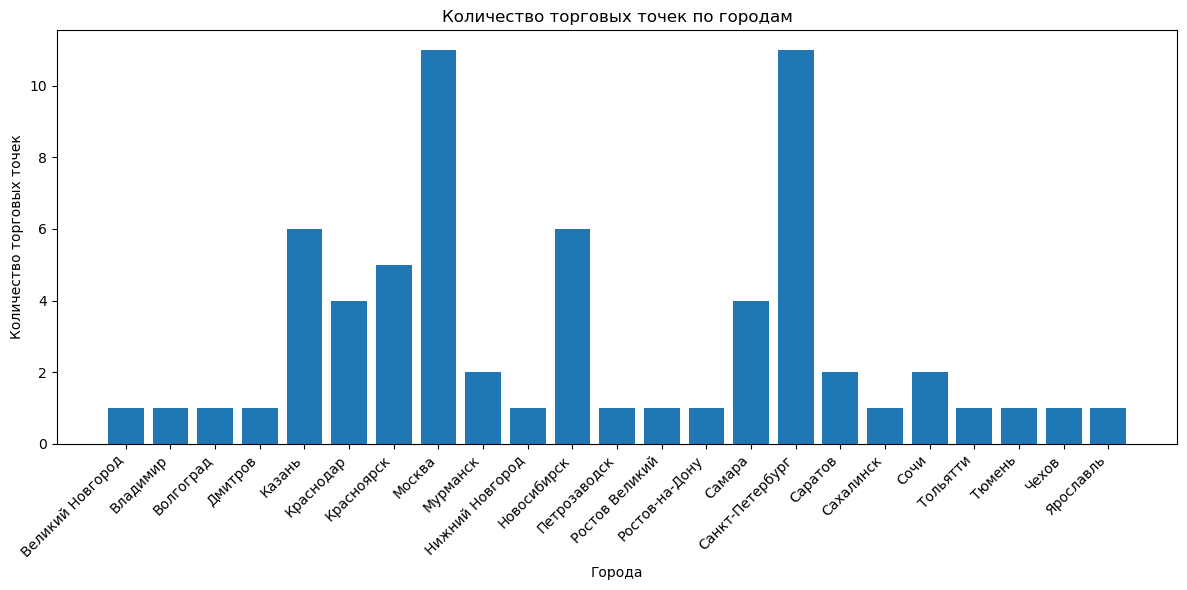

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(trading_points_city['index'], trading_points_city['city'])
plt.xlabel('Города')
plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек по городам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<b>Агрегация таблицы с суммой платежей на каждого клиента.</b>

In [19]:
data = pd.merge(payment, clients, left_on = 'id_client', right_on = 'id_client', how = 'outer' )

In [20]:
data

,id_order,id_client,amt_payment,dtime_pay,dtime_ad,nflag_test,id_trading_point
0,100238.0,194569,5373.0,2022-10-28 04:05:15.221,2022-07-12 21:48:15.896,1.0,1654.0
1,213184.0,194569,5141.0,2022-08-18 01:08:29.632,2022-07-12 21:48:15.896,1.0,1654.0
2,100242.0,191056,4151.0,2022-08-01 02:42:54.992,2022-07-04 03:09:39.699,0.0,80.0
3,100249.0,200049,5688.0,2022-08-24 12:45:12.744,2022-07-26 13:25:59.976,0.0,309.0
4,100258.0,206161,4330.0,2022-12-09 15:13:26.437,2022-08-10 22:55:02.538,0.0,699.0
...,...,...,...,...,...,...,...
62796,NaN,331831,NaN,NaT,2022-07-01 04:28:28.282,0.0,55.0
62797,NaN,211355,NaN,NaT,2022-08-03 02:00:09.287,0.0,82.0
62798,NaN,260405,NaN,NaT,2022-08-15 02:47:58.960,0.0,576.0
62799,NaN,244069,NaN,NaT,2022-08-08 00:12:31.319,1.0,991.0


In [21]:
data['amt_payment'] = data['amt_payment'].fillna(0)

In [22]:
data = data.merge(region_dict, on = 'id_trading_point')
data

,id_order,id_client,amt_payment,dtime_pay,dtime_ad,nflag_test,id_trading_point,city
0,100238.0,194569,5373.0,2022-10-28 04:05:15.221,2022-07-12 21:48:15.896,1.0,1654.0,Москва
1,213184.0,194569,5141.0,2022-08-18 01:08:29.632,2022-07-12 21:48:15.896,1.0,1654.0,Москва
2,100271.0,183519,3727.0,2022-09-11 01:06:17.180,2022-06-15 08:30:16.730,1.0,1654.0,Москва
3,140099.0,183519,5858.0,2022-10-21 11:50:20.680,2022-06-15 08:30:16.730,1.0,1654.0,Москва
4,148219.0,183519,3908.0,2022-07-11 07:30:34.579,2022-06-15 08:30:16.730,1.0,1654.0,Москва
...,...,...,...,...,...,...,...,...
62528,NaN,287702,0.0,NaT,2022-06-16 04:48:54.608,1.0,13.0,Нижний Новгород
62529,NaN,264861,0.0,NaT,2022-08-02 15:19:29.105,1.0,13.0,Нижний Новгород
62530,NaN,313035,0.0,NaT,2022-07-04 06:41:10.203,0.0,13.0,Нижний Новгород
62531,NaN,312740,0.0,NaT,2022-06-11 17:49:49.701,1.0,13.0,Нижний Новгород


In [23]:
data_clients = data.groupby('id_client').agg({'amt_payment':'sum','id_order':'count'}).reset_index() 
data_clients = data_clients.rename(columns = {'amt_payment':'sum_payment'})
data_clients

,id_client,sum_payment,id_order
0,178561,3052.0,1
1,178562,2439.0,1
2,178563,768.0,1
3,178564,0.0,0
4,178565,958.0,1
...,...,...,...
55351,331949,0.0,0
55352,331950,0.0,0
55353,331954,0.0,0
55354,331955,0.0,0


In [24]:
data_gcl = pd.merge(data_clients, clients, how = 'left', left_on = 'id_client', right_on = 'id_client')

data_gcl.head()

,id_client,sum_payment,id_order,dtime_ad,nflag_test,id_trading_point
0,178561,3052.0,1,2022-06-03 02:47:49.183,0,453
1,178562,2439.0,1,2022-06-03 02:51:21.878,0,2652
2,178563,768.0,1,2022-06-03 02:52:10.616,1,112
3,178564,0.0,0,2022-06-03 02:53:10.089,1,26
4,178565,958.0,1,2022-06-03 02:55:13.525,1,739


In [25]:
data_gclr = pd.merge(data_gcl, region_dict, left_on = 'id_trading_point', right_on = 'id_trading_point')

data_gclr

,id_client,sum_payment,id_order,dtime_ad,nflag_test,id_trading_point,city
0,178561,3052.0,1,2022-06-03 02:47:49.183,0,453,Санкт-Петербург
1,178567,2663.0,1,2022-06-03 03:02:56.855,0,453,Санкт-Петербург
2,187264,3769.0,1,2022-06-24 15:11:16.453,1,453,Санкт-Петербург
3,187283,2296.0,1,2022-06-24 16:33:55.167,1,453,Санкт-Петербург
4,187285,1978.0,1,2022-06-24 16:44:29.136,1,453,Санкт-Петербург
...,...,...,...,...,...,...,...
55351,327843,0.0,0,2022-08-14 13:16:11.542,0,7,Ростов Великий
55352,329017,0.0,0,2022-08-01 13:27:19.635,1,7,Ростов Великий
55353,330020,0.0,0,2022-07-28 13:17:18.749,1,7,Ростов Великий
55354,331519,0.0,0,2022-07-02 20:36:42.439,0,7,Ростов Великий


In [26]:
data_gclr['payment_flag'] = np.where(data_gclr['sum_payment'] > 0, 1, 0)

data_gclr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   sum_payment       55356 non-null  float64       
 2   id_order          55356 non-null  int64         
 3   dtime_ad          55356 non-null  datetime64[ns]
 4   nflag_test        55356 non-null  int64         
 5   id_trading_point  55356 non-null  int64         
 6   city              55356 non-null  object        
 7   payment_flag      55356 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(1)
memory usage: 3.6+ MB


In [27]:
data_gclr['sum_payment'] = data_gclr['sum_payment'].fillna(0)

In [28]:
data_gclr

,id_client,sum_payment,id_order,dtime_ad,nflag_test,id_trading_point,city,payment_flag
0,178561,3052.0,1,2022-06-03 02:47:49.183,0,453,Санкт-Петербург,1
1,178567,2663.0,1,2022-06-03 03:02:56.855,0,453,Санкт-Петербург,1
2,187264,3769.0,1,2022-06-24 15:11:16.453,1,453,Санкт-Петербург,1
3,187283,2296.0,1,2022-06-24 16:33:55.167,1,453,Санкт-Петербург,1
4,187285,1978.0,1,2022-06-24 16:44:29.136,1,453,Санкт-Петербург,1
...,...,...,...,...,...,...,...,...
55351,327843,0.0,0,2022-08-14 13:16:11.542,0,7,Ростов Великий,0
55352,329017,0.0,0,2022-08-01 13:27:19.635,1,7,Ростов Великий,0
55353,330020,0.0,0,2022-07-28 13:17:18.749,1,7,Ростов Великий,0
55354,331519,0.0,0,2022-07-02 20:36:42.439,0,7,Ростов Великий,0


# Functions

In [34]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
    else:
        print("Гипотеза H0 подтверждается: средние равны")
    
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p

In [35]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p

In [36]:
no_payment_points = []

for i in data_gclr['id_trading_point'].unique():
    sum_a = data_gclr[(data_gclr['id_trading_point'] == i) & (data_gclr['nflag_test']==0)]['sum_payment'].sum()
    sum_b = data_gclr[(data_gclr['id_trading_point'] == i) & (data_gclr['nflag_test']==1)]['sum_payment'].sum()
    if (sum_a == 0)|(sum_b == 0):
        no_payment_points.append(i)
print('Торговые точки без платежей:', no_payment_points)

Торговые точки без платежей: [26, 739, 866, 46, 1099, 1015, 603, 810, 800, 228, 1, 13, 23, 4, 7]


In [37]:
print(len(no_payment_points))

15


In [38]:
empty_group_points = []

for i in data_gclr['id_trading_point'].unique():

    c_a = data_gclr[(data_gclr['id_trading_point'] == i) & (data_gclr['nflag_test']==0)].count()['id_client']
    c_b = data_gclr[(data_gclr['id_trading_point'] == i) & (data_gclr['nflag_test']==1)].count()['id_client']
    if (c_a == 0)|(c_b == 0):
        empty_group_points.append(i)
print('Торговые точки с пустующей контрольной/тестовой группой:', empty_group_points)

Торговые точки с пустующей контрольной/тестовой группой: [739, 866, 1099, 1015, 603, 810, 800, 228]


In [39]:
print(len(empty_group_points))

8


In [40]:
filtered_points = data_gclr[~data_gclr['id_trading_point'].isin(no_payment_points + empty_group_points)]
filtered_points

,id_client,sum_payment,id_order,dtime_ad,nflag_test,id_trading_point,city,payment_flag
0,178561,3052.0,1,2022-06-03 02:47:49.183,0,453,Санкт-Петербург,1
1,178567,2663.0,1,2022-06-03 03:02:56.855,0,453,Санкт-Петербург,1
2,187264,3769.0,1,2022-06-24 15:11:16.453,1,453,Санкт-Петербург,1
3,187283,2296.0,1,2022-06-24 16:33:55.167,1,453,Санкт-Петербург,1
4,187285,1978.0,1,2022-06-24 16:44:29.136,1,453,Санкт-Петербург,1
...,...,...,...,...,...,...,...,...
54772,329631,0.0,0,2022-08-17 02:19:56.903,1,73,Сочи,0
54773,330077,0.0,0,2022-08-21 07:43:55.815,1,73,Сочи,0
54774,330213,0.0,0,2022-07-02 03:52:45.625,0,73,Сочи,0
54775,330510,0.0,0,2022-07-25 10:18:08.087,1,73,Сочи,0


In [41]:
filtered_points.describe()

,id_client,sum_payment,id_order,nflag_test,id_trading_point,payment_flag
count,45318.000000,45318.000000,45318.000000,45318.000000,45318.000000,45318.000000
mean,228009.605918,2319.490534,0.653140,0.495278,1202.962002,0.521316
std,45298.985278,2963.928692,0.765635,0.499983,1792.091001,0.499551
min,178561.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,192426.250000,0.000000,0.000000,0.000000,112.000000,0.000000
50%,206413.500000,1178.000000,1.000000,0.000000,453.000000,1.000000
75%,262840.000000,3911.000000,1.000000,1.000000,1654.000000,1.000000
max,331964.000000,43083.000000,10.000000,1.000000,9931.000000,1.000000


In [42]:
filtered_points['id_trading_point'].unique()

array([ 453, 2652,  112, 3786,  117,   80,   88,   11,   55,  212,  477,
        309,  439,  576,   33,   66, 1287,  277, 1654, 3987,  202,   54,
         72,  444, 1101,  544,  699,  900, 1989,  991,   34,    2,  213,
         35, 2212,   19,  516, 8543,  278,  801, 6543,   82,  573,  891,
       9121, 1002, 9931,   36,  394,   69,   73], dtype=int64)

In [43]:
print(len(data_gclr) - len(filtered_points))

10038


In [46]:
import seaborn as sns

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1047592196.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(filtered_points[filtered_points['nflag_test']==0][filtered_points['sum_payment']>0]['sum_payment'], color='red')
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1047592196.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(filtered_points[filtered_points['nflag_test']==1][filtered_points['sum_payment']>0]['sum_payment'], color='yellow')


<Axes: xlabel='sum_payment', ylabel='Count'>

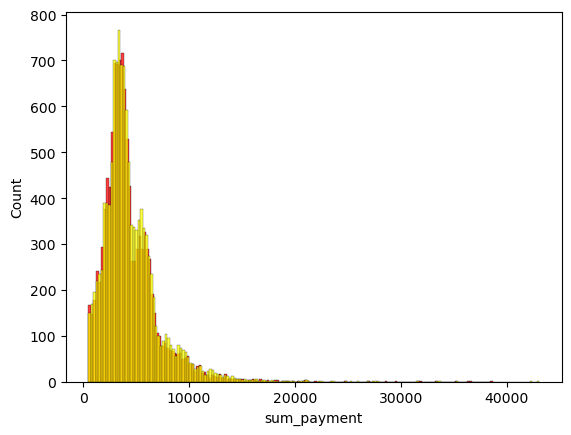

In [47]:
sns.histplot(filtered_points[filtered_points['nflag_test']==0][filtered_points['sum_payment']>0]['sum_payment'], color='red')
sns.histplot(filtered_points[filtered_points['nflag_test']==1][filtered_points['sum_payment']>0]['sum_payment'], color='yellow')

In [48]:
datafp = filtered_points

<b>test_calc: сравниваем средние платежи</b>

In [49]:
s_t, p_t = test_calc(datafp[datafp['nflag_test'] == 0]['sum_payment'], datafp[datafp['nflag_test'] == 1]['sum_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2189.1884317754557
Среднее значение 2 ряда 2452.2773446201827
Разница средних =  -263.088912844727
P_value =  3.3214645838934018e-21


<b> test_calc: сравниваем конверсию в платеж.</b>

In [50]:
s_t, p_t = test_calc(datafp[datafp['nflag_test']==0]['payment_flag'],datafp[datafp['nflag_test']==1]['payment_flag'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.49975954181786386
Среднее значение 2 ряда 0.5432835820895522
Разница средних =  -0.043524040271688325
P_value =  1.7338073027564523e-20


<b>mann_whitney_func </b>

In [51]:
s_mw, p_mw = mann_whitney_func(datafp[datafp['nflag_test']==0]['sum_payment'],datafp[datafp['nflag_test']==1]['sum_payment'])


Распределения не равны
P_value =  3.008345273971901e-24


In [52]:
s_mw, p_mw = mann_whitney_func(datafp[datafp['nflag_test']==0]['payment_flag'],datafp[datafp['nflag_test']==1]['payment_flag'])



Распределения не равны
P_value =  1.8043406994299902e-20


<b>Москва</b>

In [54]:
df_msk = datafp[datafp['city']=='Москва']

s_t, p_t = test_calc(datafp[datafp['nflag_test']==0]['sum_payment'],datafp[datafp['nflag_test']==1]['sum_payment'])
print()
s_t, p_t = test_calc(df_msk[df_msk['nflag_test']==0]['payment_flag'],df_msk[df_msk['nflag_test']==1]['payment_flag'])
print()
p_mw = mann_whitney_func(df_msk[df_msk['nflag_test']==0]['sum_payment'],df_msk[df_msk['nflag_test']==1]['sum_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2189.1884317754557
Среднее значение 2 ряда 2452.2773446201827
Разница средних =  -263.088912844727
P_value =  3.3214645838934018e-21

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.4879498714652956
Среднее значение 2 ряда 0.5435278774046299
Разница средних =  -0.05557800593933432
P_value =  6.194689260032549e-10

Распределения не равны
P_value =  7.010591402203484e-16


C:\Users\803034\AppData\Local\Temp\ipykernel_11344\2613817459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_msk[df_msk['nflag_test']==0][df_msk['sum_payment']>0]['sum_payment'], color='red')
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\2613817459.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_msk[df_msk['nflag_test']==1][df_msk['sum_payment']>0]['sum_payment'], color='yellow')


<Axes: xlabel='sum_payment', ylabel='Count'>

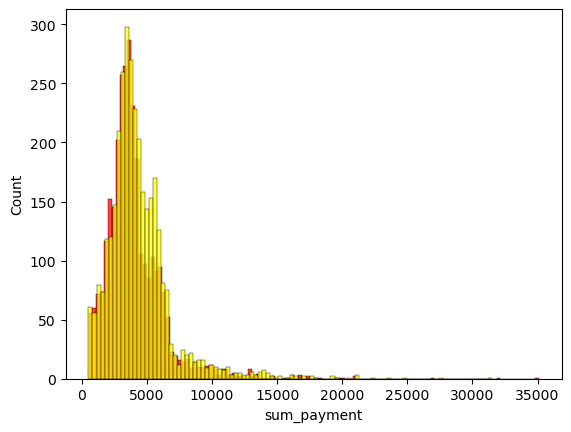

In [55]:
sns.histplot(df_msk[df_msk['nflag_test']==0][df_msk['sum_payment']>0]['sum_payment'], color='red')
sns.histplot(df_msk[df_msk['nflag_test']==1][df_msk['sum_payment']>0]['sum_payment'], color='yellow')

<b>Санкт-Петербург</b>

In [56]:
df_spb = datafp[datafp['city']=='Санкт-Петербург']

s_t, p_t = test_calc(datafp[datafp['nflag_test']==0]['sum_payment'],datafp[datafp['nflag_test']==1]['sum_payment'])
print()
s_t, p_t = test_calc(df_spb[df_spb['nflag_test']==0]['payment_flag'],df_spb[df_spb['nflag_test']==1]['payment_flag'])
print()
p_mw = mann_whitney_func(df_spb[df_spb['nflag_test']==0]['sum_payment'],df_spb[df_spb['nflag_test']==1]['sum_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2189.1884317754557
Среднее значение 2 ряда 2452.2773446201827
Разница средних =  -263.088912844727
P_value =  3.3214645838934018e-21

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.44835363103292736
Среднее значение 2 ряда 0.5471316085489314
Разница средних =  -0.09877797751600403
P_value =  1.065825659919673e-20

Распределения не равны
P_value =  2.0392184217953754e-20


C:\Users\803034\AppData\Local\Temp\ipykernel_11344\3241669694.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_spb[df_spb['nflag_test']==0][df_spb['sum_payment']>0]['sum_payment'], color='red')
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\3241669694.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_spb[df_spb['nflag_test']==1][df_spb['sum_payment']>0]['sum_payment'], color='yellow')


<Axes: xlabel='sum_payment', ylabel='Count'>

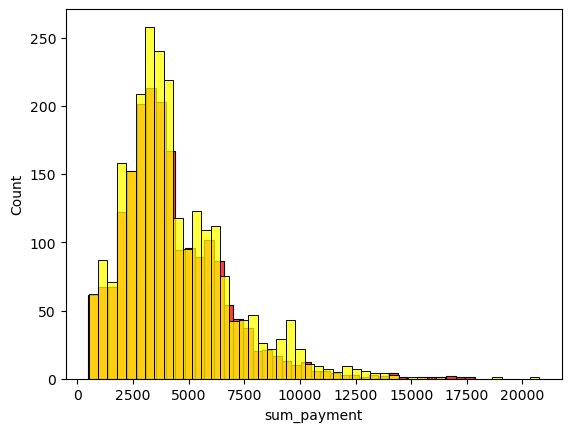

In [57]:
sns.histplot(df_spb[df_spb['nflag_test']==0][df_spb['sum_payment']>0]['sum_payment'], color='red')
sns.histplot(df_spb[df_spb['nflag_test']==1][df_spb['sum_payment']>0]['sum_payment'], color='yellow')

<b>Другие города</b>

In [58]:
all_cities = list(datafp['city'].unique())
end_test_big = ['Москва', 'Санкт-Петербург']
other_cities = []

for i in all_cities:
    if i not in end_test_big:
        other_cities.append(i)
        
print('Все города: ', all_cities)
print()
print('Протестированные города: ', end_test_big)
print()
print('Остальные города: ', other_cities)

Все города:  ['Санкт-Петербург', 'Москва', 'Саратов', 'Тольятти', 'Владимир', 'Мурманск', 'Красноярск', 'Казань', 'Самара', 'Волгоград', 'Сочи', 'Краснодар', 'Дмитров', 'Тюмень', 'Сахалинск']

Протестированные города:  ['Москва', 'Санкт-Петербург']

Остальные города:  ['Саратов', 'Тольятти', 'Владимир', 'Мурманск', 'Красноярск', 'Казань', 'Самара', 'Волгоград', 'Сочи', 'Краснодар', 'Дмитров', 'Тюмень', 'Сахалинск']


In [59]:
for i in datafp['city'].unique():
    if i in other_cities:
        print('Город: ', i)
        s_t, p_t = test_calc(datafp[datafp['nflag_test']==0]['sum_payment'][datafp['city']==i],\
                            datafp[datafp['nflag_test']==1]['sum_payment'][datafp['city']==i])
        print()
        s_t, p_t = test_calc(datafp[datafp['nflag_test']==0]['sum_payment'][datafp['city']==i],\
                             datafp[datafp['nflag_test']==1]['sum_payment'][datafp['city']==i])
        print()
        p_mw = mann_whitney_func(datafp[datafp['nflag_test']==0]['sum_payment'][datafp['city']==i],\
                                 datafp[datafp['nflag_test']==1]['sum_payment'][datafp['city']==i])
        print()
        print('--Следующий город--')
        print()

Город:  Саратов
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2541.6456266907126
Среднее значение 2 ряда 2528.7887462981244
Разница средних =  12.85688039258821
P_value =  0.9162512798549167

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2541.6456266907126
Среднее значение 2 ряда 2528.7887462981244
Разница средних =  12.85688039258821
P_value =  0.9162512798549167

Распределения равны
P_value =  0.7833257779753139

--Следующий город--

Город:  Тольятти
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2439.4610778443116
Среднее значение 2 ряда 2902.4105263157894
Разница средних =  -462.9494484714778
P_value =  0.1333273246710206

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2439.4610778443116
Среднее значение 2 ряда 2902.4105263157894
Разница средних =  -462.9494484714778
P_value =  0.1333273246710206

Распределения равны
P_value =  0.22134177144014489

--Следующий город--

Город:  Владимир
Гипотеза H0 не подт

Саратов



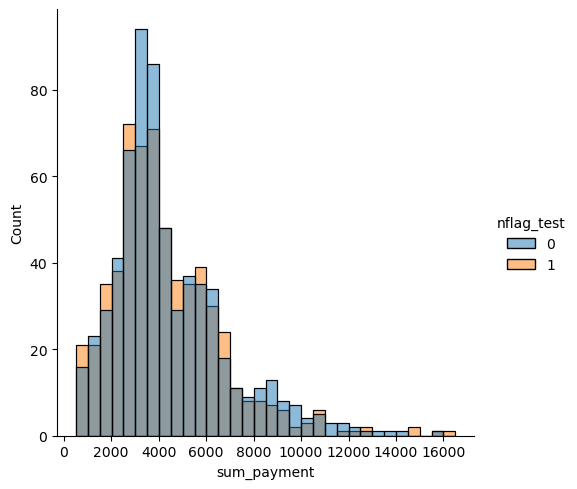

Тольятти



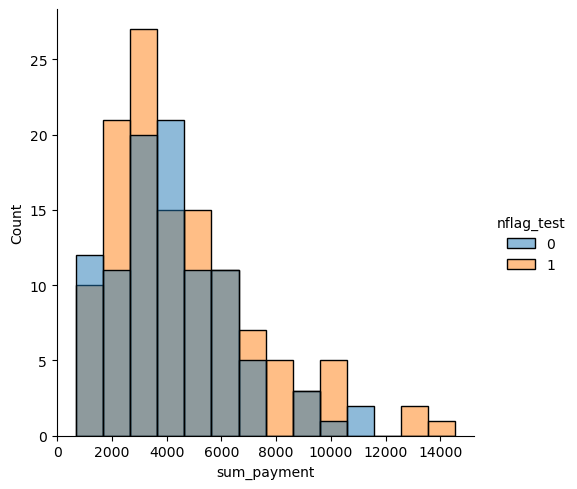

Владимир



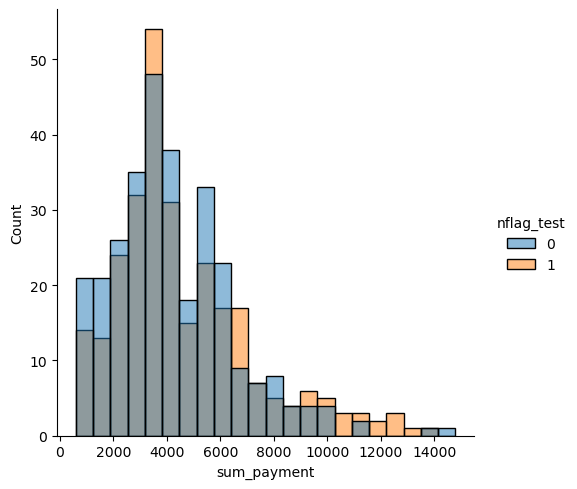

Мурманск



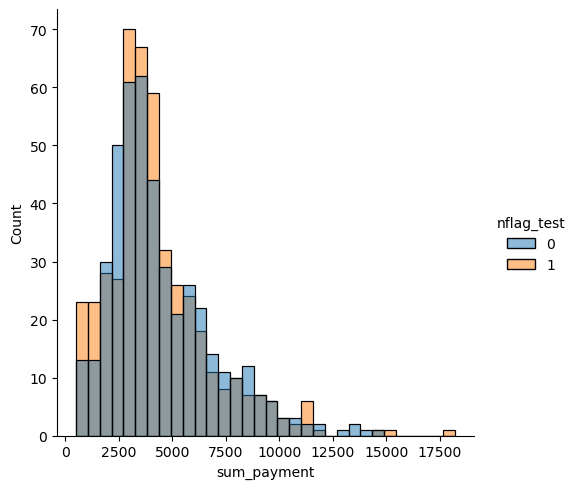

Красноярск



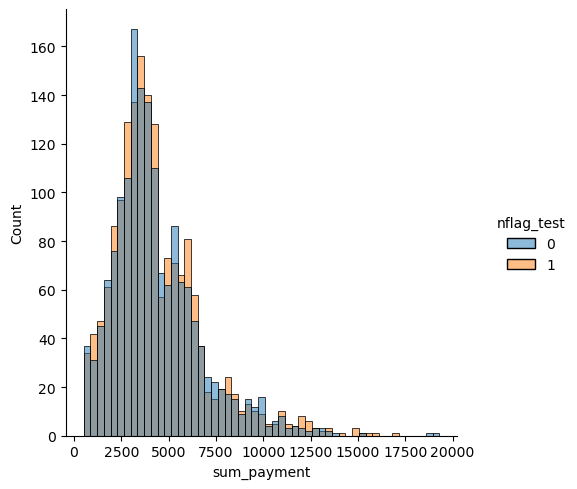

Казань



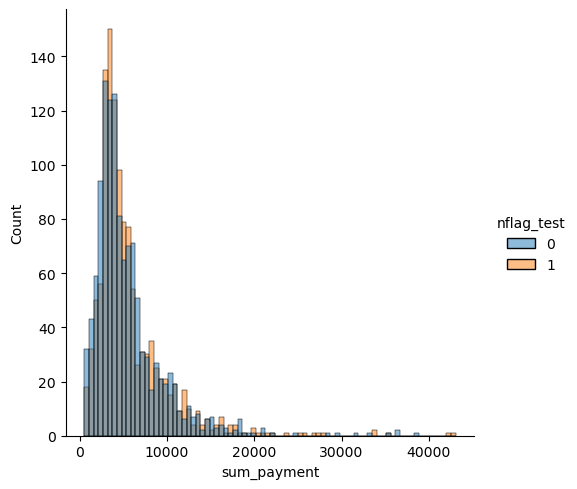

Самара



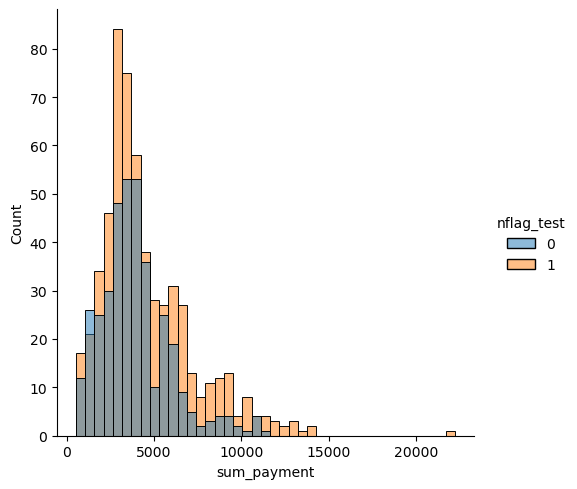

Волгоград



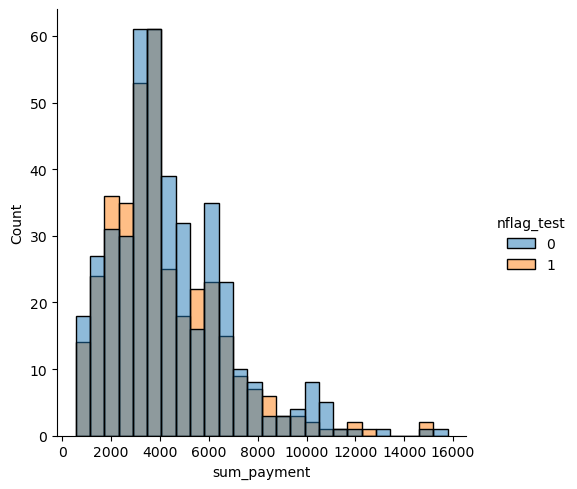

Сочи



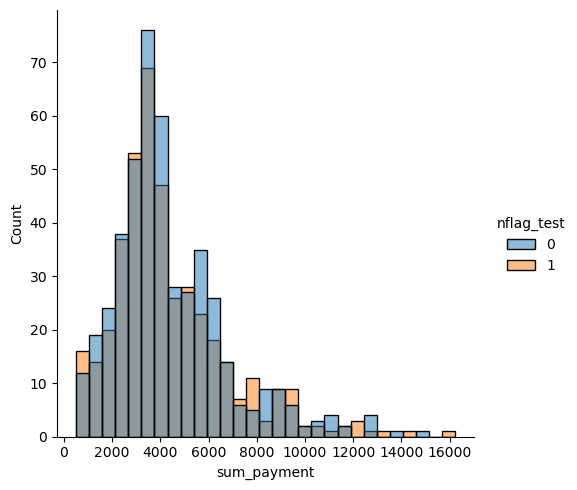

Краснодар



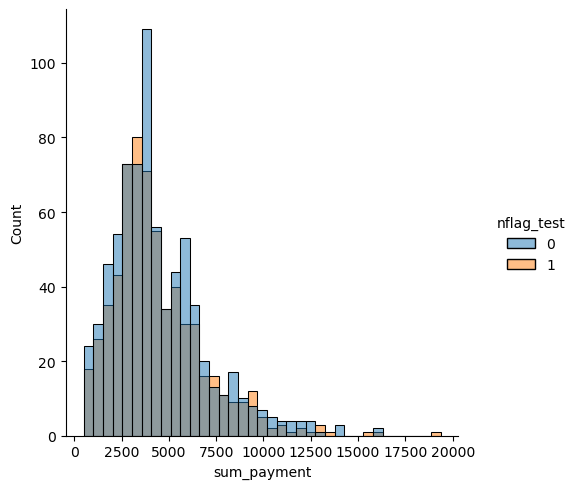

Дмитров



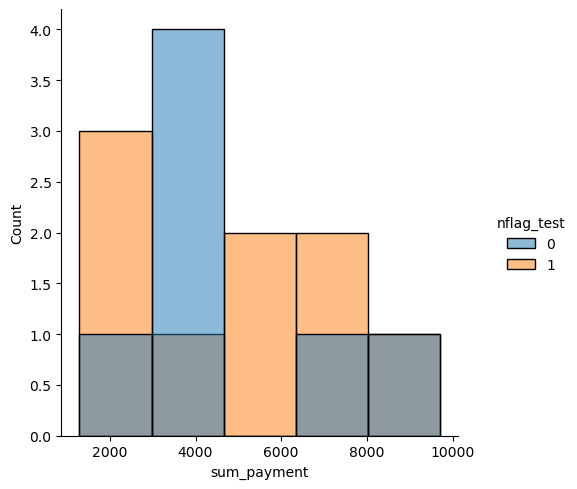

Тюмень



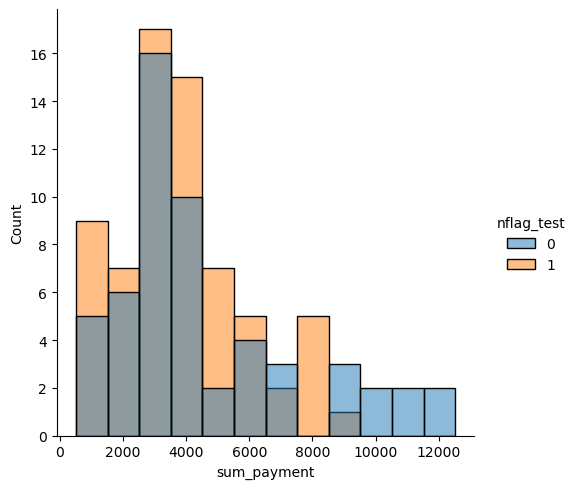

Сахалинск



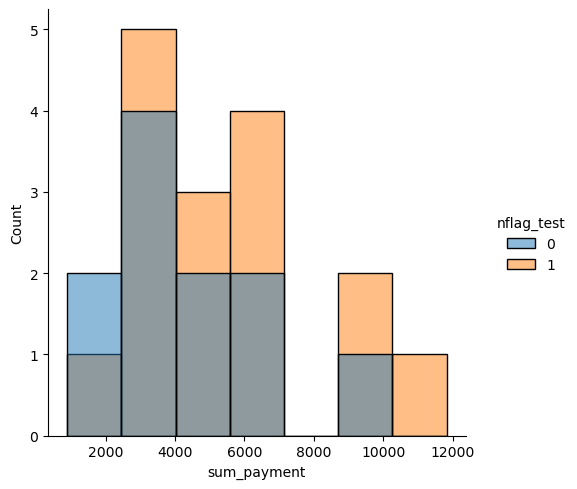

In [60]:
for i in other_cities:
    
    print(i)
    
    print()
    
    df_city = datafp[datafp['city'] == i]
    
    sns.displot(df_city[df_city['sum_payment'] > 0], x = 'sum_payment', hue = 'nflag_test')
    plt.show()

<b>Отчет по АБ Тесту</b>

In [78]:
results_data = pd.DataFrame()

for i in datafp['city'].unique():
    datafp_i = datafp[datafp['city']==i]
    
    for j in datafp_i['id_trading_point'].unique():
        
        datafp_j = datafp_i[datafp_i['id_trading_point']==j]
        
        count_test = len(datafp_j[datafp_j['nflag_test']==1])
        count_control = len(datafp_j[datafp['nflag_test']==0])
        count_all = count_test + count_control
        sigma_test = datafp_j[datafp_j['nflag_test']==1]['sum_payment'].std()
        sigma_control = datafp_j[datafp_j['nflag_test']==0]['sum_payment'].std()
        avg_payment_test = np.mean(datafp_j[datafp_j['nflag_test']==1]['sum_payment'])
        avg_payment_control = np.mean(datafp_j[datafp_j['nflag_test']==0]['sum_payment'])
        diff = avg_payment_test - avg_payment_control
        
        s_a,p_a = test_calc(datafp_j[datafp_j['nflag_test']==1]['sum_payment'], datafp_j[datafp_j['nflag_test']==0]['sum_payment'])
        results_data = results_data.append({'city':i,
                                        'id_trading_point':j,
                                        'count_test':count_test,
                                        'count_control':count_control,
                                        'count_all':count_all,
                                        'avg_payment_test':avg_payment_test,
                                        'avg_payment_control':avg_payment_control,
                                        'diff':diff,
                                        'sigma_test':sigma_test,
                                        'sigma_control':sigma_control,
                                        'ttest':s_a,
                                        'pvalue_ttest':p_a,
                                       }, ignore_index=True)

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2501.966228893058
Среднее значение 2 ряда 1889.9237368922784
Разница средних =  612.0424920007797
P_value =  6.983206901274464e-07
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2488.115030674847
Среднее значение 2 ряда 2218.636896046852
Разница средних =  269.4781346279947
P_value =  0.07683710303752554
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2582.2976
Среднее значение 2 ряда 2050.6916524701874
Разница средних =  531.6059475298125
P_value =  0.0007003816631342835
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2706.2791666666667
Среднее значение 2 ряда 2392.8949579831933
Разница средних =  313.3842086834734
P_value =  0.21988338416718506


C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1594.436507936508
Среднее значение 2 ряда 1342.1293759512937
Разница средних =  252.30713198521426
P_value =  0.07628783375813585
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2450.9910447761195
Среднее значение 2 ряда 1689.791788856305
Разница средних =  761.1992559198145
P_value =  0.0002452534239227363
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2977.6293103448274
Среднее значение 2 ряда 2277.6117647058823
Разница средних =  700.0175456389452
P_value =  0.006168215295010464
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2925.1422222222222
Среднее значение 2 ряда 2352.2830188679245
Разница средних =  572.8592033542977
P_value =  0.036305006065519056


C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2929.045197740113
Среднее значение 2 ряда 1641.2125
Разница средних =  1287.832697740113
P_value =  7.29407411923071e-05
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2618.949685534591
Среднее значение 2 ряда 1980.6586826347304
Разница средних =  638.2910028998606
P_value =  0.03346203684469195
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1229.6442307692307
Среднее значение 2 ряда 973.6235294117647
Разница средних =  256.020701357466
P_value =  0.403758846751074
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2506.616805983282
Среднее значение 2 ряда 1972.8476793248944
Разница средних =  533.7691266583877
P_value =  2.0059224232258568e-11
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2613.6835443037976
Среднее значение 2 ряда 2688.2302158273383
Разница средних =  -74.54667152354068
P_value =  0.7815857297661141
Гипотеза H0 не

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.ap

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 3132.301627033792
Среднее значение 2 ряда 2507.8864516129033
Разница средних =  624.4151754208888
P_value =  6.050970845492351e-05
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1602.9950062421972
Среднее значение 2 ряда 1639.8573248407642
Разница средних =  -36.86231859856707
P_value =  0.7780070273603263
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2813.1682464454975
Среднее значение 2 ряда 2739.3627204030226
Разница средних =  73.80552604247487
P_value =  0.7119719350975426
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1859.777027027027
Среднее значение 2 ряда 1804.25
Разница средних =  55.52702702702709
P_value =  0.8663043555057068
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1702.439577039275
Среднее значение 2 ряда 1528.3251088534107
Разница средних =  174.11446818586433
P_value =  0.18197815948321544
Гипотеза H0 подтверждается:

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.ap

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2586.0118343195268
Среднее значение 2 ряда 2655.6724890829696
Разница средних =  -69.66065476344284
P_value =  0.8079974055696059
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2902.4105263157894
Среднее значение 2 ряда 2439.4610778443116
Разница средних =  462.9494484714778
P_value =  0.1333273246710206
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2547.2200392927307
Среднее значение 2 ряда 2108.6101973684213
Разница средних =  438.6098419243094
P_value =  0.010095112170351712
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2109.10663507109
Среднее значение 2 ряда 2111.272941176471
Разница средних =  -2.1663061053809542
P_value =  0.9910124894120407
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1702.7140600315956
Среднее значение 2 ряда 1688.5125
Разница средних =  14.20156003159559
P_value =  0.922300518333421
Гипотеза H0 подтверждается:

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2499.345794392523
Среднее значение 2 ряда 2185.2147239263804
Разница средних =  314.1310704661428
P_value =  0.06901056074583502
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2259.6230366492146
Среднее значение 2 ряда 2496.9870466321245
Разница средних =  -237.36400998290992
P_value =  0.3728909035918657
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2481.9605633802817
Среднее значение 2 ряда 2400.6353276353275
Разница средних =  81.32523574495417
P_value =  0.781042303541428
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2621.4270557029176
Среднее значение 2 ряда 2635.548076923077
Разница средних =  -14.121021220159491
P_value =  0.9625274336266005
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2422.286307053942
Среднее значение 2 ряда 2574.3522267206476
Разница средних =  -152.06591966670567
P_value =  0.5524803558814528
Гипотеза H0 не подтвер

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1987.328244274809
Среднее значение 2 ряда 860.418439716312
Разница средних =  1126.909804558497
P_value =  7.318758090993358e-05
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2288.8706240487063
Среднее значение 2 ряда 2601.7610241820767
Разница средних =  -312.89040013337035
P_value =  0.03686899928098654
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2371.4334975369457
Среднее значение 2 ряда 2523.37558685446
Разница средних =  -151.94208931751427
P_value =  0.3467675852041211
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2092.181818181818
Среднее значение 2 ряда 2521.9580838323354
Разница средних =  -429.7762656505174
P_value =  0.13559014690618418
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2176.003821656051
Среднее значение 2 ряда 2523.5788262370543
Разница средних =  -347.5750045810032
P_value =  0.013358447618918195
Г

C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'city':i,
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_control = len(datafp_j[datafp['nflag_test']==0])
C:\Users\803034\AppData\Local\Temp\ipykernel_11344\1654741170.py:20: FutureWarning: The frame.ap

In [79]:
results_data


,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Санкт-Петербург,453,1066,1049,2115,2501.966229,1889.923737,612.042492,2993.442540,2648.659303,4.976910,6.983207e-07
1,Санкт-Петербург,112,652,683,1335,2488.115031,2218.636896,269.478135,2778.179183,2780.790660,1.770712,7.683710e-02
2,Санкт-Петербург,117,625,587,1212,2582.297600,2050.691652,531.605948,2835.004503,2595.737792,3.398196,7.003817e-04
3,Санкт-Петербург,309,240,238,478,2706.279167,2392.894958,313.384209,2814.939849,2761.938716,1.228455,2.198834e-01
4,Санкт-Петербург,576,630,657,1287,1594.436508,1342.129376,252.307132,2683.727211,2415.822664,1.774073,7.628783e-02
5,Санкт-Петербург,900,335,341,676,2450.991045,1689.791789,761.199256,2865.607356,2492.472611,3.686914,2.452534e-04
6,Санкт-Петербург,213,232,255,487,2977.629310,2277.611765,700.017546,2905.494362,2710.043413,2.750752,6.168215e-03
7,Санкт-Петербург,801,225,212,437,2925.142222,2352.283019,572.859203,2774.292063,2928.285838,2.099991,3.630501e-02
8,Санкт-Петербург,573,177,160,337,2929.045198,1641.212500,1287.832698,3201.098137,2619.044781,4.016569,7.294074e-05
9,Санкт-Петербург,891,159,167,326,2618.949686,1980.658683,638.291003,2899.782464,2489.571942,2.135593,3.346204e-02


In [80]:
results_data['percent_count']=(results_data['count_all']/results_data['count_all'].sum())
results_data

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count
0,Санкт-Петербург,453,1066,1049,2115,2501.966229,1889.923737,612.042492,2993.442540,2648.659303,4.976910,6.983207e-07,0.046670
1,Санкт-Петербург,112,652,683,1335,2488.115031,2218.636896,269.478135,2778.179183,2780.790660,1.770712,7.683710e-02,0.029458
2,Санкт-Петербург,117,625,587,1212,2582.297600,2050.691652,531.605948,2835.004503,2595.737792,3.398196,7.003817e-04,0.026744
3,Санкт-Петербург,309,240,238,478,2706.279167,2392.894958,313.384209,2814.939849,2761.938716,1.228455,2.198834e-01,0.010548
4,Санкт-Петербург,576,630,657,1287,1594.436508,1342.129376,252.307132,2683.727211,2415.822664,1.774073,7.628783e-02,0.028399
5,Санкт-Петербург,900,335,341,676,2450.991045,1689.791789,761.199256,2865.607356,2492.472611,3.686914,2.452534e-04,0.014917
6,Санкт-Петербург,213,232,255,487,2977.629310,2277.611765,700.017546,2905.494362,2710.043413,2.750752,6.168215e-03,0.010746
7,Санкт-Петербург,801,225,212,437,2925.142222,2352.283019,572.859203,2774.292063,2928.285838,2.099991,3.630501e-02,0.009643
8,Санкт-Петербург,573,177,160,337,2929.045198,1641.212500,1287.832698,3201.098137,2619.044781,4.016569,7.294074e-05,0.007436
9,Санкт-Петербург,891,159,167,326,2618.949686,1980.658683,638.291003,2899.782464,2489.571942,2.135593,3.346204e-02,0.007194


In [81]:
results_data['label'] = np.where((results_data['pvalue_ttest'] < .05) & (results_data['diff'] > 0), 'positive'
                              ,np.where((results_data['pvalue_ttest'] < .05) & (results_data['diff'] < 0), 'negative'
                              ,'neutral'))

results_data

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count,label
0,Санкт-Петербург,453,1066,1049,2115,2501.966229,1889.923737,612.042492,2993.442540,2648.659303,4.976910,6.983207e-07,0.046670,positive
1,Санкт-Петербург,112,652,683,1335,2488.115031,2218.636896,269.478135,2778.179183,2780.790660,1.770712,7.683710e-02,0.029458,neutral
2,Санкт-Петербург,117,625,587,1212,2582.297600,2050.691652,531.605948,2835.004503,2595.737792,3.398196,7.003817e-04,0.026744,positive
3,Санкт-Петербург,309,240,238,478,2706.279167,2392.894958,313.384209,2814.939849,2761.938716,1.228455,2.198834e-01,0.010548,neutral
4,Санкт-Петербург,576,630,657,1287,1594.436508,1342.129376,252.307132,2683.727211,2415.822664,1.774073,7.628783e-02,0.028399,neutral
5,Санкт-Петербург,900,335,341,676,2450.991045,1689.791789,761.199256,2865.607356,2492.472611,3.686914,2.452534e-04,0.014917,positive
6,Санкт-Петербург,213,232,255,487,2977.629310,2277.611765,700.017546,2905.494362,2710.043413,2.750752,6.168215e-03,0.010746,positive
7,Санкт-Петербург,801,225,212,437,2925.142222,2352.283019,572.859203,2774.292063,2928.285838,2.099991,3.630501e-02,0.009643,positive
8,Санкт-Петербург,573,177,160,337,2929.045198,1641.212500,1287.832698,3201.098137,2619.044781,4.016569,7.294074e-05,0.007436,positive
9,Санкт-Петербург,891,159,167,326,2618.949686,1980.658683,638.291003,2899.782464,2489.571942,2.135593,3.346204e-02,0.007194,positive


In [82]:
with pd.ExcelWriter('AB_Test_Results.xlsx') as writer:
    for label, label_data in results_data.groupby('label'):
        label_data.to_excel(writer, sheet_name=label, index=False)

In [83]:
print("УРА!!! Результаты успешно выгружены в Excel файл.")

УРА!!! Результаты успешно выгружены в Excel файл.
